<h1><center>Music Genre Application</center></h1>

## [1] Objective
Develop a machine learning-based music genre classification application that can accurately analyze and categorize audio tracks into predefined music genres.

## [2] Data Understanding
- track_id character Song unique ID
- track_name character Song Name
- track_artist character Song Artist
- track_popularity double Song Popularity (0-100) where higher is better
- track_album_id character Album unique ID
- track_album_name character Song album name
- track_album_release_date character Date when album released
- playlist_name character Name of playlist
- playlist_id character Playlist ID
- playlist_genre character Playlist genre
- playlist_subgenre character Playlist subgenre
- danceability double Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- energy double Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
- key double The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
- loudness double The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
- mode double Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
- speechiness double Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
- acousticness double A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- instrumentalness double Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
- liveness double Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
valence double A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- tempo double The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- duration_ms double Duration of song in milliseconds

## [3] Importing Libraries

In [163]:
import warnings
warnings.filterwarnings("ignore")

In [164]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, StandardScaler

# Statistic libraries
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from scipy.stats import chi2, chi2_contingency


# Modelling Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.ensemble import GradientBoostingClassifier

# Model evaluation libraries
from sklearn.metrics import confusion_matrix, classification_report, auc
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,classification_report
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score
from sklearn.model_selection import cross_val_predict, cross_val_score

# Save Model for future use
import joblib

## [4] Getting the Data

In [165]:
df = pd.read_csv('../../data/spotify_songs.csv')

In [166]:
df.head().T

,0,1,2,3,4
track_id,6f807x0ima9a1j3VPbc7VN,0r7CVbZTWZgbTCYdfa2P31,1z1Hg7Vb0AhHDiEmnDE79l,75FpbthrwQmzHlBJLuGdC7,1e8PAfcKUYoKkxPhrHqw4x
track_name,I Don't Care (with Justin Bieber) - Loud Luxur...,Memories - Dillon Francis Remix,All the Time - Don Diablo Remix,Call You Mine - Keanu Silva Remix,Someone You Loved - Future Humans Remix
track_artist,Ed Sheeran,Maroon 5,Zara Larsson,The Chainsmokers,Lewis Capaldi
track_popularity,66,67,70,60,69
track_album_id,2oCs0DGTsRO98Gh5ZSl2Cx,63rPSO264uRjW1X5E6cWv6,1HoSmj2eLcsrR0vE9gThr4,1nqYsOef1yKKuGOVchbsk6,7m7vv9wlQ4i0LFuJiE2zsQ
track_album_name,I Don't Care (with Justin Bieber) [Loud Luxury...,Memories (Dillon Francis Remix),All the Time (Don Diablo Remix),Call You Mine - The Remixes,Someone You Loved (Future Humans Remix)
track_album_release_date,2019-06-14,2019-12-13,2019-07-05,2019-07-19,2019-03-05
playlist_name,Pop Remix,Pop Remix,Pop Remix,Pop Remix,Pop Remix
playlist_id,37i9dQZF1DXcZDD7cfEKhW,37i9dQZF1DXcZDD7cfEKhW,37i9dQZF1DXcZDD7cfEKhW,37i9dQZF1DXcZDD7cfEKhW,37i9dQZF1DXcZDD7cfEKhW
playlist_genre,pop,pop,pop,pop,pop


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

```We need to convert track_album_release_date into datetime```

In [168]:
df.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

```track_name, track_artist, track_album_name contain missing values```

In [169]:
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


**Observations**
- track_popularity Ranges from 0-100. Average track popularity is 42.48.Their is a slight difference between the mean and median.  
- 25% of the track has popularity value above 62.
- avg. daceability value of songs in our dataset has value around 0.65
- avg. energy level of a song is 0.70. 25% of songs have an energy level above 0.84.
- 50% Songs have a duration 0f 216000ms which is 216 seconds or 3 minutes 36sec or 3.6 minutes. 
- We have a song which is 517810 ms long which is 8.63 minutes long.Surely we have an outleir in this feature. (We will see which song is this)

In [170]:
# checking uniqueness
df.nunique()

track_id                    28356
track_name                  23449
track_artist                10692
track_popularity              101
track_album_id              22545
track_album_name            19743
track_album_release_date     4530
playlist_name                 449
playlist_id                   471
playlist_genre                  6
playlist_subgenre              24
danceability                  822
energy                        952
key                            12
loudness                    10222
mode                            2
speechiness                  1270
acousticness                 3731
instrumentalness             4729
liveness                     1624
valence                      1362
tempo                       17684
duration_ms                 19785
dtype: int64

In [171]:
# checking for duplicate values
df.duplicated().sum()

0

```There are no duplicate values in our dataset```

## [5] Data Preprocessing

```
Lets take care of:
    -   Missing values
    -   track_album_release_date to datetime
```

In [172]:
df.dropna(inplace=True)

In [173]:
df.isnull().sum()

track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

```There are no duplicate values```

In [174]:
df['track_album_release_date'].dtype

dtype('O')

In [175]:
df['track_album_release_date'].value_counts()

track_album_release_date
2020-01-10    270
2019-11-22    244
2019-12-06    235
2019-12-13    220
2013-01-01    219
             ... 
1973-08-28      1
2000-03-23      1
1967-04         1
1968-07-03      1
2014-04-18      1
Name: count, Length: 4529, dtype: int64

In [176]:
# Lets extract year and month from track_album_release_date
df['album_release_year'] = pd.DatetimeIndex(df['track_album_release_date']).year
df['album_release_month'] = pd.DatetimeIndex(df['track_album_release_date']).month

In [177]:
df.head().T

,0,1,2,3,4
track_id,6f807x0ima9a1j3VPbc7VN,0r7CVbZTWZgbTCYdfa2P31,1z1Hg7Vb0AhHDiEmnDE79l,75FpbthrwQmzHlBJLuGdC7,1e8PAfcKUYoKkxPhrHqw4x
track_name,I Don't Care (with Justin Bieber) - Loud Luxur...,Memories - Dillon Francis Remix,All the Time - Don Diablo Remix,Call You Mine - Keanu Silva Remix,Someone You Loved - Future Humans Remix
track_artist,Ed Sheeran,Maroon 5,Zara Larsson,The Chainsmokers,Lewis Capaldi
track_popularity,66,67,70,60,69
track_album_id,2oCs0DGTsRO98Gh5ZSl2Cx,63rPSO264uRjW1X5E6cWv6,1HoSmj2eLcsrR0vE9gThr4,1nqYsOef1yKKuGOVchbsk6,7m7vv9wlQ4i0LFuJiE2zsQ
track_album_name,I Don't Care (with Justin Bieber) [Loud Luxury...,Memories (Dillon Francis Remix),All the Time (Don Diablo Remix),Call You Mine - The Remixes,Someone You Loved (Future Humans Remix)
track_album_release_date,2019-06-14,2019-12-13,2019-07-05,2019-07-19,2019-03-05
playlist_name,Pop Remix,Pop Remix,Pop Remix,Pop Remix,Pop Remix
playlist_id,37i9dQZF1DXcZDD7cfEKhW,37i9dQZF1DXcZDD7cfEKhW,37i9dQZF1DXcZDD7cfEKhW,37i9dQZF1DXcZDD7cfEKhW,37i9dQZF1DXcZDD7cfEKhW
playlist_genre,pop,pop,pop,pop,pop


## [6] Exploratory Data Analysis

In [178]:
df.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'album_release_year', 'album_release_month'],
      dtype='object')

#### **Uni-variate Analysis**

<p style="color: green">How many unique songs are there in our dataset?</p>

In [179]:
# checking uniqueness using track_id
df['track_id'].unique().shape

(28352,)

```There are 28352 unique songs```

<p style="color: green">Which artist has the most track in our dataset</p>

In [180]:
# Top 10 artists with many songs
df['track_artist'].value_counts().head(10)

track_artist
Martin Garrix                161
Queen                        136
The Chainsmokers             123
David Guetta                 110
Don Omar                     102
Drake                        100
Dimitri Vegas & Like Mike     93
Calvin Harris                 91
Hardwell                      84
Kygo                          83
Name: count, dtype: int64

```Martin Garrix lead with 161 tracks followed by Queen, The Chainsmokers ,,,```

<Axes: xlabel='track_popularity', ylabel='Count'>

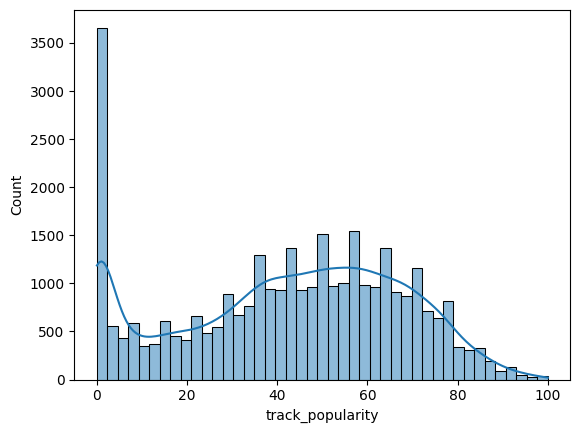

In [181]:
sns.histplot(data=df, x='track_popularity',kde=True)

<p style='color:green'>What is the distribution of genre and what genre has the maximum songs?</p>

In [182]:
df['playlist_genre'].value_counts()

playlist_genre
edm      6043
rap      5743
pop      5507
r&b      5431
latin    5153
rock     4951
Name: count, dtype: int64

<Axes: xlabel='playlist_genre', ylabel='count'>

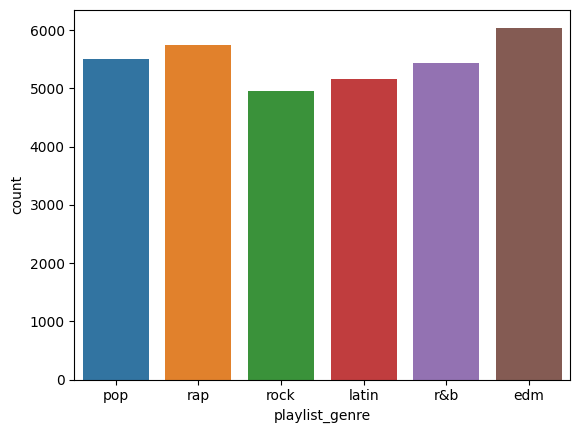

In [183]:
# visualize it using countplot
sns.countplot(data=df, x='playlist_genre')

```edm is the most popular genre followed by rap, pop, r&b, latin and rock ```

<p style="color:green">Which sub-genre is most popular in our dataset</p>

In [184]:
df['playlist_subgenre'].value_counts()

playlist_subgenre
progressive electro house    1809
southern hip hop             1674
indie poptimism              1672
latin hip hop                1655
neo soul                     1637
pop edm                      1517
electro house                1511
hard rock                    1485
gangster rap                 1456
electropop                   1408
urban contemporary           1405
hip hop                      1322
dance pop                    1298
classic rock                 1296
trap                         1291
tropical                     1288
latin pop                    1262
hip pop                      1256
big room                     1206
new jack swing               1133
post-teen pop                1129
permanent wave               1105
album rock                   1065
reggaeton                     948
Name: count, dtype: int64

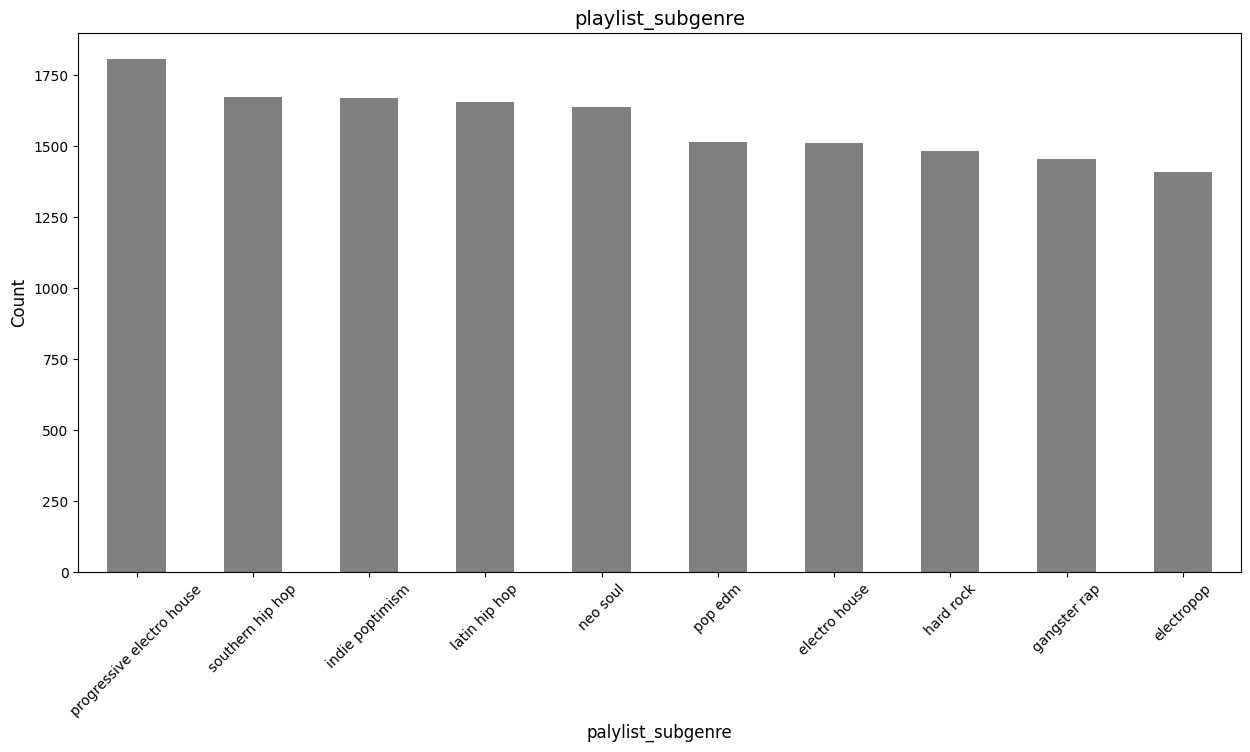

In [185]:
# visualization
paper = plt.figure(figsize=(15,7))
df['playlist_subgenre'].value_counts()[:10].plot.bar(color='grey')
plt.title('playlist_subgenre',size=14)
plt.xlabel('palylist_subgenre',size=12)
plt.ylabel('Count',size=12)
plt.xticks(rotation=45)
plt.show()


```progressive electro house is the most popuar sub-genre ```

<p style='color:green'>What is the distribution of the following features: <strong>danceability,energy,loudness,speechiness,acousticness,instrumentalness, liveness,valence and tempo</strong></p>

In [186]:
def plot(col):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw={'wspace': 0.4, 'hspace': 0.4})
    sns.boxplot(data=df, x=col, ax=axes[0])
    sns.distplot(a=df[col], ax=axes[1], color='#ff4125')
    plt.show()

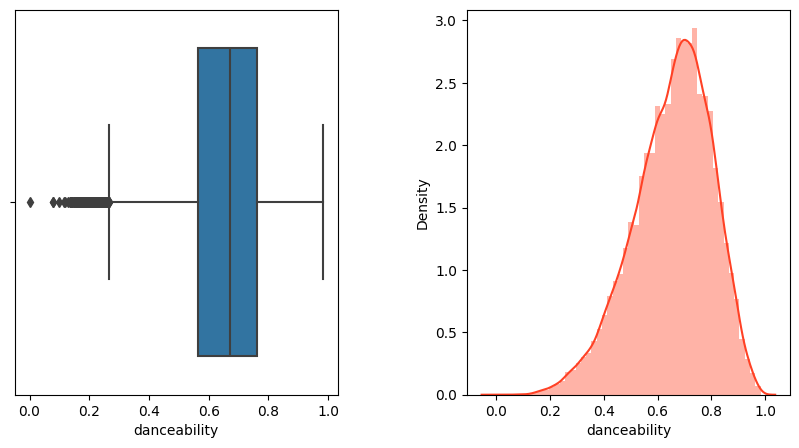

In [187]:
plot('danceability')

```danceability has an outlier```

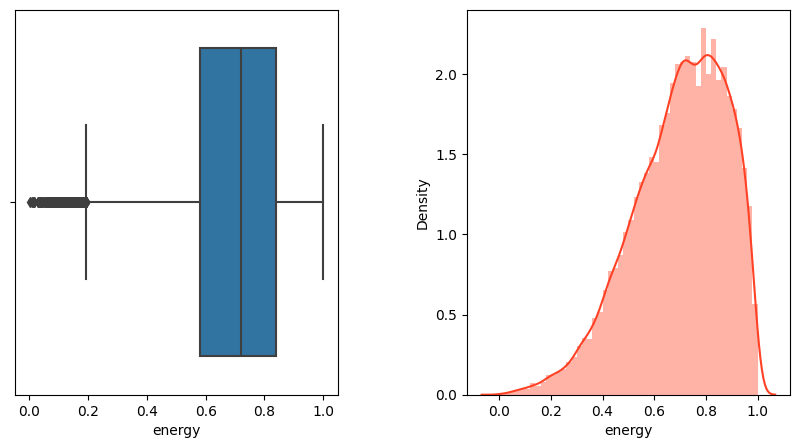

In [188]:
plot('energy')

```energy feature has also few outliers on the lower side```

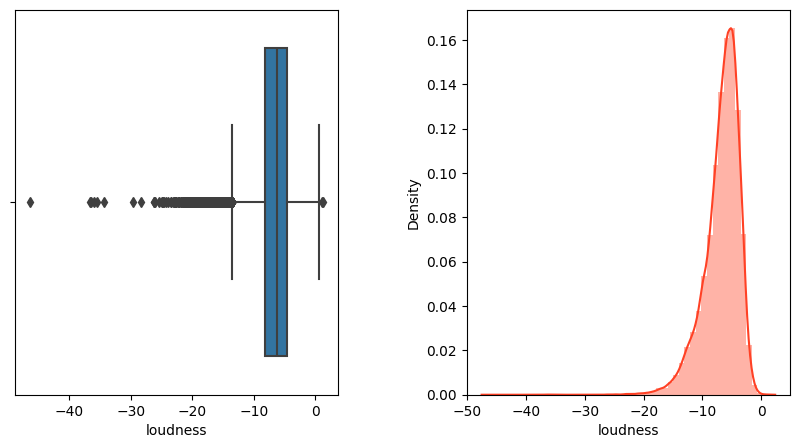

In [189]:
plot('loudness')

```Most songs in our playlist have a loudness of -10 to 0 decibels.```

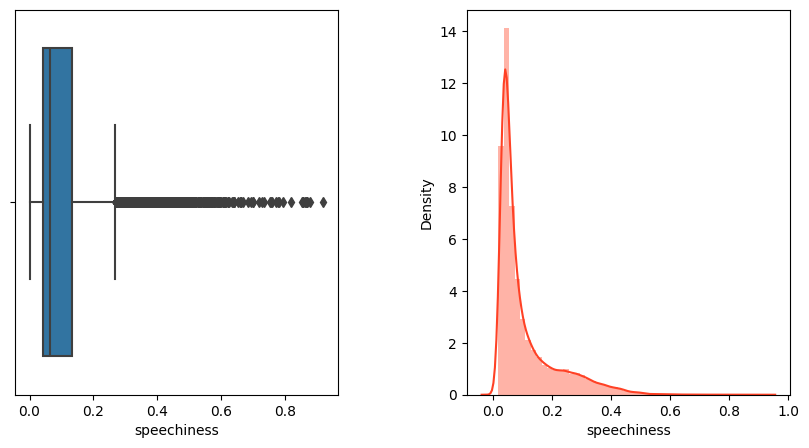

In [190]:
plot('speechiness')

```Most songs in our Dataset have a speechiness of 0.0 - 0.2 which means most of the songs have more of music and non-speech like tracks. Few tracks have very high speechiness of 0.91 which shows these tracks are either talk shows or poetry.```

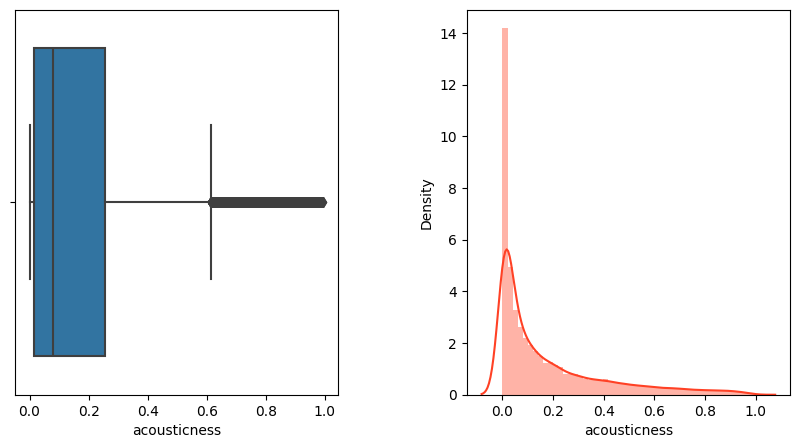

In [191]:
plot('acousticness')

```Mostlt tracks have acousticness value between 0 and 0.2. Few tracks have a acousticness of 0.99```

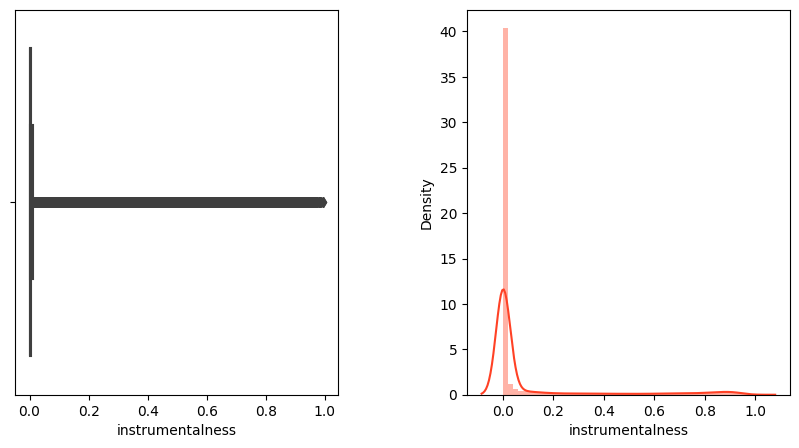

In [192]:
plot('instrumentalness')

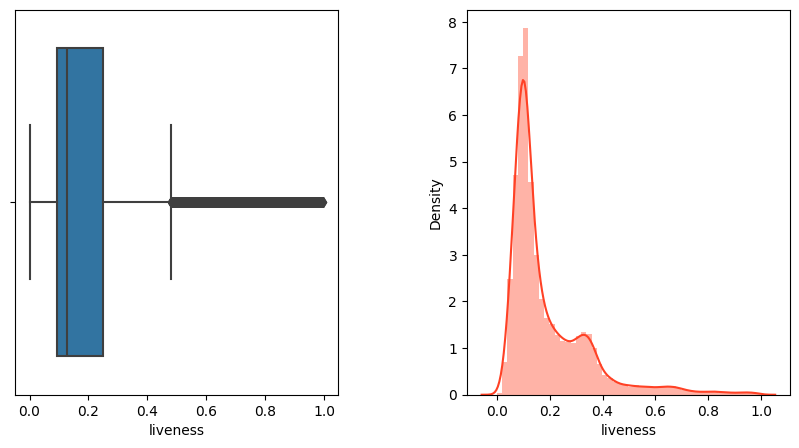

In [193]:
plot('liveness')

```Instrumentaless and liveness has also few outliers on the right side of the curve.```

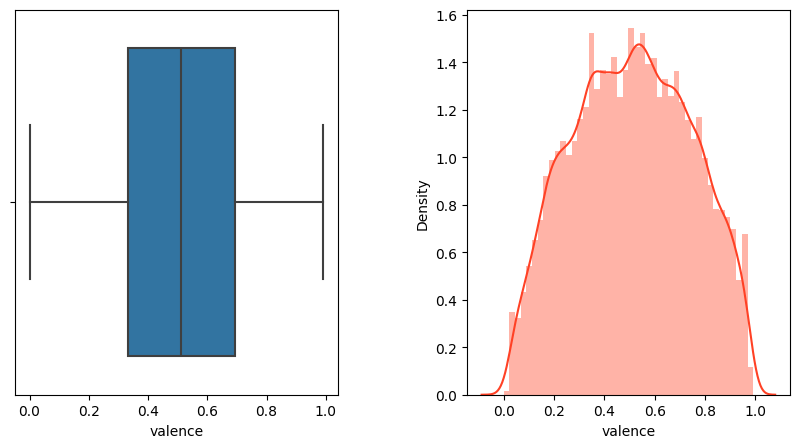

In [194]:
plot('valence')

```valence is almost normally distributed.```

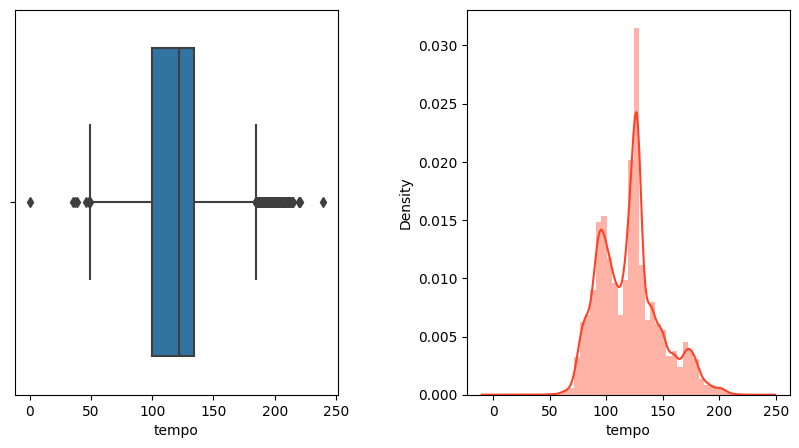

In [195]:
plot('tempo')

```We have both type of tracks which have very less and very high tempo in our dataset```

<p style="color:green">Which Year had many release</p>

In [196]:
# year with many release 
df['album_release_year'].value_counts().head(10)

album_release_year
2019    9081
2018    3312
2017    2428
2016    2127
2015    1779
2014    1524
2013     956
2020     785
2012     783
2008     622
Name: count, dtype: int64

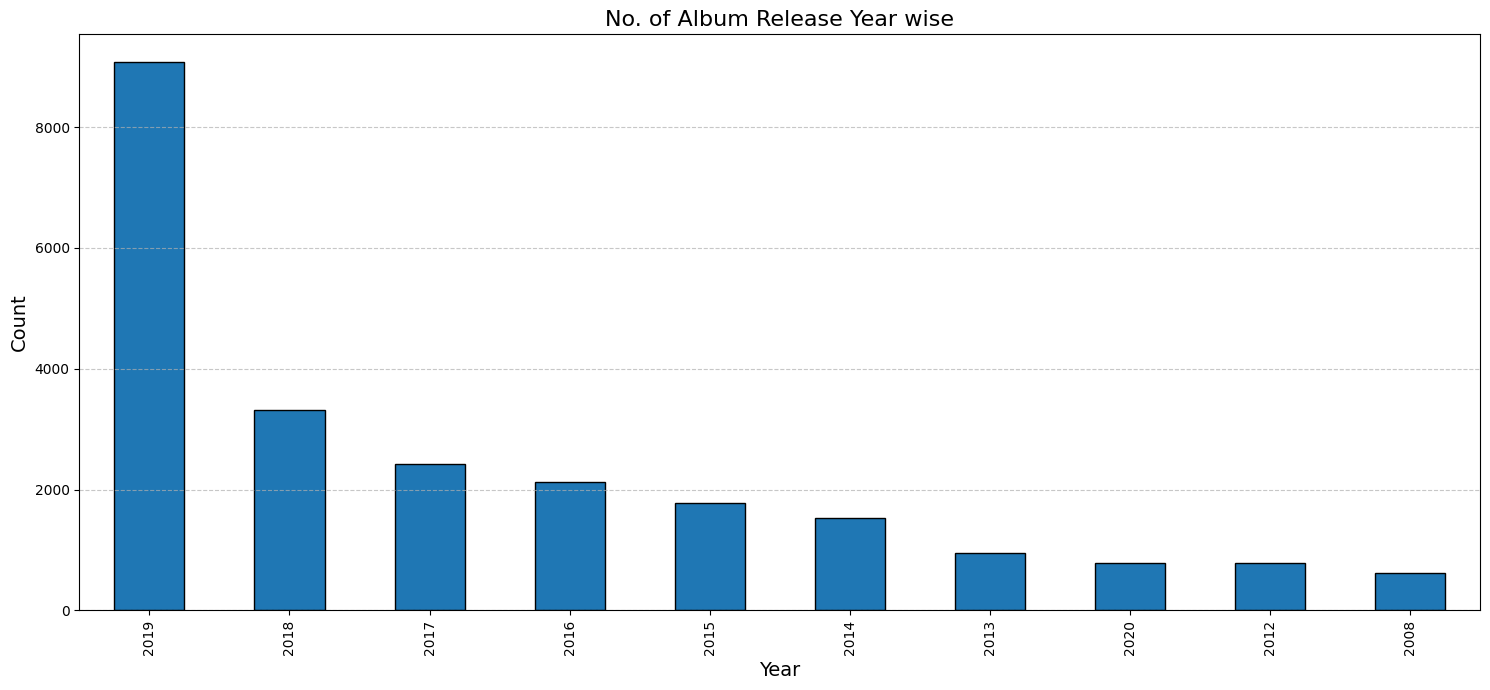

In [197]:
# Lets plot a bar chart
paper = plt.figure(figsize=(15,7))
df['album_release_year'].value_counts()[:10].sort_values(ascending=False).plot.bar(edgecolor='black')
plt.xlabel('Year',size=14)
plt.ylabel('Count',size=14)
plt.title('No. of Album Release Year wise',size=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

```maximum release as shown above is 2019 followed by 2018, 2017 and so on```

<p style="color:green">Which month had many release</p>

In [198]:
df['album_release_month'].value_counts()

album_release_month
1     6945
11    3359
10    3086
9     2543
12    2446
6     2390
8     2299
5     2214
3     2014
7     2010
4     1904
2     1618
Name: count, dtype: int64

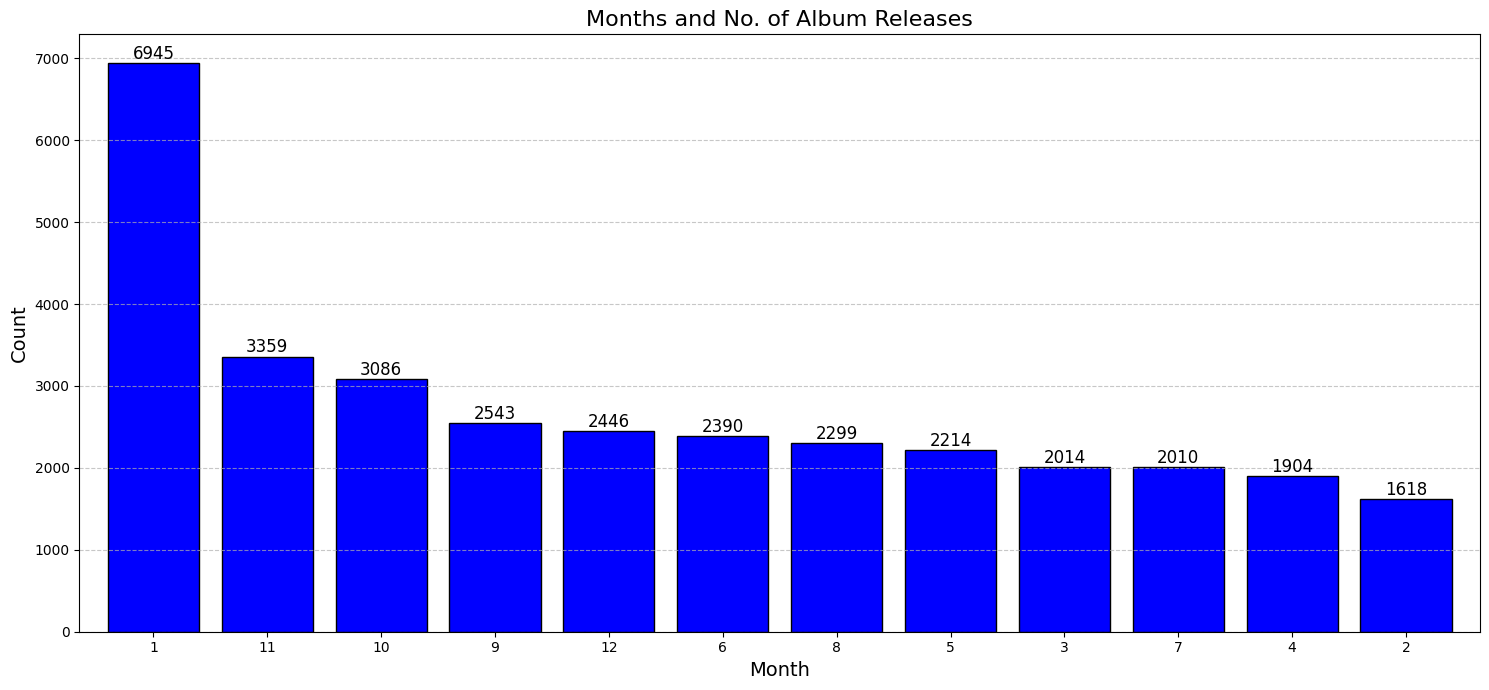

In [199]:
#Lets plot a bar graph
paper = plt.figure(figsize=(15,7))
df['album_release_month'].value_counts().plot.bar(color='blue', edgecolor='black', width=0.8)
plt.xlabel('Month',size=14)
plt.ylabel('Count',size=14)
plt.xticks(rotation = 0)
plt.title('Months and No. of Album Releases',size=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, count in enumerate(df['album_release_month'].value_counts()):
    plt.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

```January was has the most release followed by November, october and so on```

#### **Bi-variate Analysis**

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32828 entries, 0 to 32832
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32828 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32828 non-null  int64  
 4   track_album_id            32828 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32828 non-null  object 
 7   playlist_name             32828 non-null  object 
 8   playlist_id               32828 non-null  object 
 9   playlist_genre            32828 non-null  object 
 10  playlist_subgenre         32828 non-null  object 
 11  danceability              32828 non-null  float64
 12  energy                    32828 non-null  float64
 13  key                       32828 non-null  int64  
 14  loudness   

In [201]:
# Lets take a look at heatmap where we will create a corellation for the numerical columns
num_col = df.select_dtypes(exclude='object')

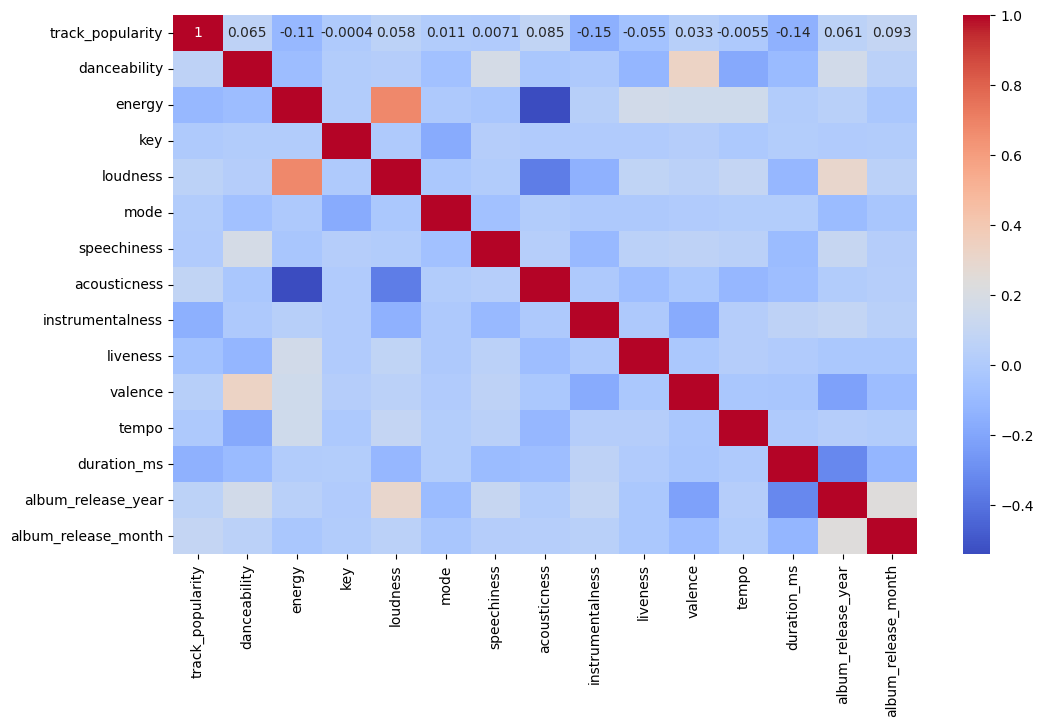

In [202]:
plt.figure(figsize=(12,7))
sns.heatmap(num_col.corr(),annot=True, cmap='coolwarm')
plt.show()

```
- energy and loudness are correlated
- acousticness is negatively corellated towords energy and loudness
```

<P style="color:green">Which is the most and least popular trach and who are associated to them?</P>

In [203]:
#Lets see which track is most popular
most_popular_index = df['track_popularity'].idxmax()
most_popular_track = df.loc[most_popular_index, 'track_name']

In [204]:
# Now lets see which track is least popular
least_popular_index = df['track_popularity'].idxmin()
least_popular_track = df.loc[least_popular_index, 'track_name']

In [205]:
#Lets print both most popular and least popular track
print(f"The most popular track is: {most_popular_track} with popularity {df.loc[most_popular_index, 'track_popularity']}")
print(f"The least popular track is: {least_popular_track} with popularity {df.loc[least_popular_index, 'track_popularity']}")

The most popular track is: Dance Monkey with popularity 100
The least popular track is: Siren with popularity 0


```The most popular track is Dance Monkey with 100 and the least is Siren :-( with 0```

In [206]:
# Let's see which artist is associated with the most popular track Dance Monkey
most_popular_artist = df.loc[most_popular_index,'track_artist']

In [207]:
print(f"The most popular track_artist is: {most_popular_artist}")

The most popular track_artist is: Tones and I


```Tones and I is the singer associated with the most popular song Dance Monkey.```

<p style="color:green">Which is the top ten track artist in terms of mean track popularity</p>

In [208]:
popular_artists = df.groupby(by = 'track_artist')['track_popularity'].mean().sort_values(ascending = False)[:10]
df_1 = pd.DataFrame({'Artist': popular_artists.index , 'Popularity': popular_artists.values})
df_1

,Artist,Popularity
0,Trevor Daniel,97.000000
1,Y2K,91.000000
2,Don Toliver,90.714286
3,Roddy Ricch,88.210526
4,DaBaby,87.857143
5,Kina,85.400000
6,JACKBOYS,85.166667
7,YNW Melly,84.600000
8,Tainy,84.000000
9,Dadá Boladão,84.000000


```Trevor Daniel is the most popular artist in terms of mean popularity followed by Y2K, Don Toliver, Roddy Ricch and so on```

<p style="color:green">What is the most popular genre</p>

In [209]:
# Let's see the most popular genre
most_popular_genre = df.groupby(by= 'playlist_genre')['track_popularity'].sum().sort_values(ascending=False)
most_popular_genre

playlist_genre
pop      262931
rap      248316
latin    242422
r&b      223885
edm      210499
rock     206597
Name: track_popularity, dtype: int64

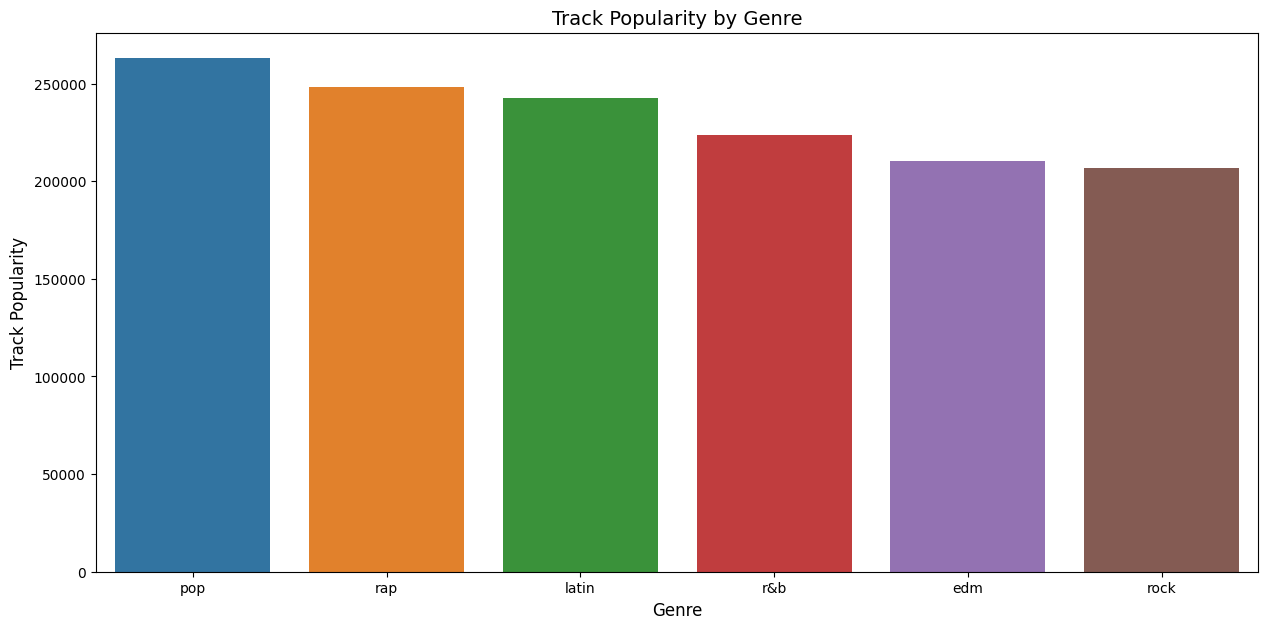

In [210]:
# Let's plot a Bar Graph
paper = plt.figure(figsize=(15,7))
sns.barplot(x=most_popular_genre.index,y=most_popular_genre.values )
plt.xlabel('Genre',size=12)
plt.ylabel('Track Popularity',size=12)
plt.title('Track Popularity by Genre',size=14)
plt.show()

```pop is the most popular genre followed by rap,latin,r&b,edm and rock.```

<p style="color:green">Which music genre tends to exhibits high level danciability</p>

In [211]:
# LEt's see which genre has the higest level of danceability
genre_avg_danceability = df.groupby(by='playlist_genre')['danceability'].mean().sort_values(ascending=False)
genre_avg_danceability

playlist_genre
rap      0.718405
latin    0.713295
r&b      0.670179
edm      0.655041
pop      0.639302
rock     0.520548
Name: danceability, dtype: float64

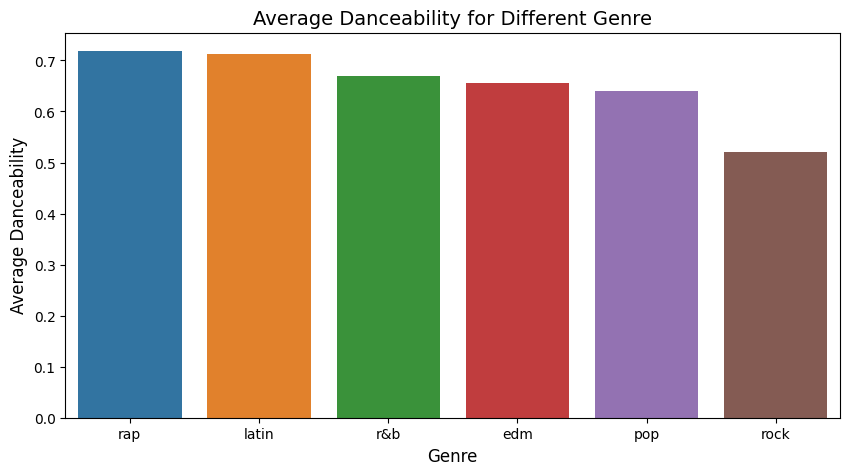

In [212]:
# Lets plot them
paper = plt.figure(figsize=(10,5))
sns.barplot(x=genre_avg_danceability.index,y=genre_avg_danceability.values)
plt.xlabel('Genre',size=12)
plt.ylabel('Average Danceability',size=12)
plt.title('Average Danceability for Different Genre',size=14)
plt.show()

```
- rap has the highest average danceability value followed by latin,r&b,edm,pop and rock
- Higher level of Danceability means genre is suitable for Dancing.
```

<p style="color:green">Which genre has the highest average Energy level? Also which song has the highest Energy Level ?</p>

In [213]:
# Let's see which genre has the higest average level of Energy
genre_avg_energy = df.groupby(by='playlist_genre')['energy'].mean().sort_values(ascending=False)
genre_avg_energy

playlist_genre
edm      0.802476
rock     0.732813
latin    0.708250
pop      0.701028
rap      0.650648
r&b      0.590934
Name: energy, dtype: float64

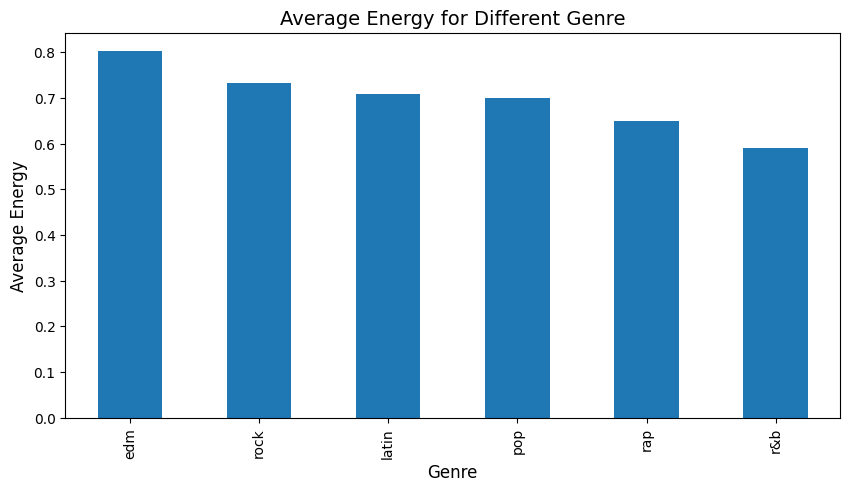

In [214]:
# Lets plot them
paper = plt.figure(figsize=(10,5))
genre_avg_energy.plot.bar()
plt.xlabel('Genre',size=12)
plt.ylabel('Average Energy',size=12)
plt.title('Average Energy for Different Genre',size=14)
plt.show()

In [215]:
# Now let's see which track has the highest energy level
highest_energy_song = df.loc[df['energy'].idxmax(), ['track_name', 'playlist_genre', 'energy']]
print(f"The song with the highest energy level is '{highest_energy_song['track_name']}' in the '{highest_energy_song['playlist_genre']}' genre with an energy level of {highest_energy_song['energy']:.2f}.")

The song with the highest energy level is 'Rain Forest and Tropical Beach Sound' in the 'latin' genre with an energy level of 1.00.


```
- edm has the highest average energy level followed by rock,latin,pop,rap and r&b
- The song with the highest energy level is Rain Forest and Tropical Beach Sound in the latin genre with an energy level of 1.00.
```

#### **Multi-variate Analysis**

In [216]:
# Lets create a pairplot to to visualize the relationships across different genres
# Selecting relevant columns
selected_columns = ['energy', 'danceability', 'valence', 'playlist_genre']

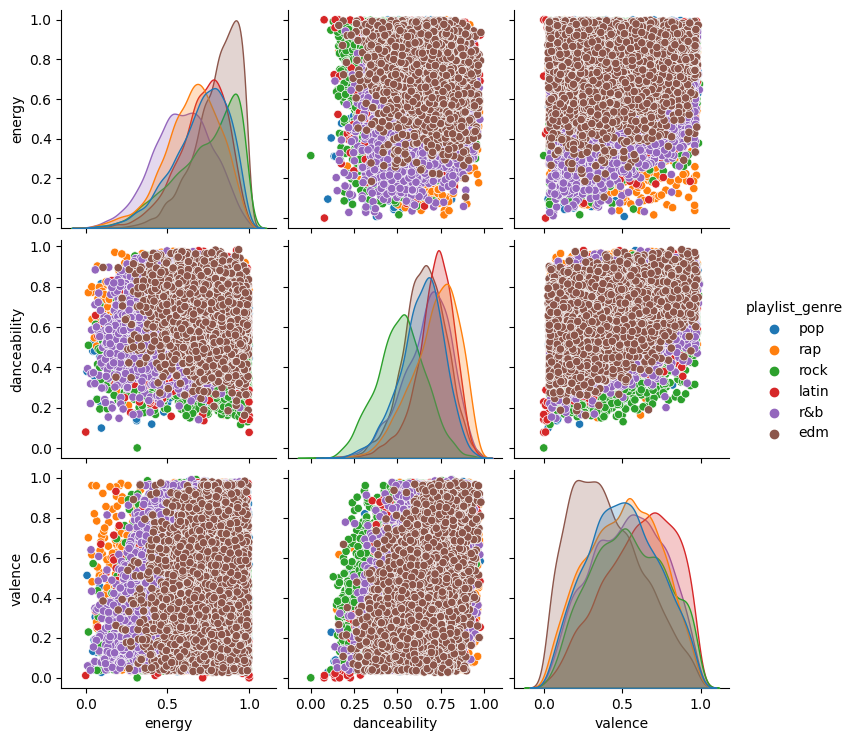

In [217]:
sns.pairplot(df[selected_columns], hue='playlist_genre')
plt.show()

```
- edm songs tends to be more energetic and have a higher valence and r&b genre songs tends to be least energetic. 
- latin genre is most suitable for dancing.
- Few rap songs are very less energetic, few of them have very high danceability and valence
```

<p style="color:green">How does the 'loudness', 'tempo', and 'energy' interact within tracks from different 'track_album_name' categories?</p>

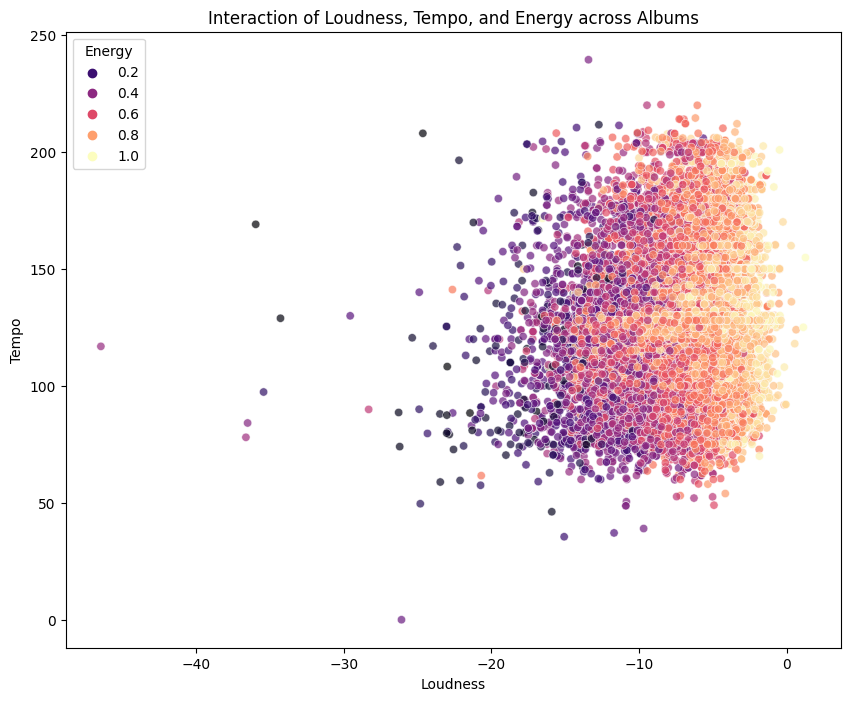

In [218]:
#  Let's plot a Scatterplot for loudness vs tempo 
plt.figure(figsize=(10, 8))
sns.scatterplot(x='loudness', y='tempo', hue='energy', data=df, palette='magma', alpha=0.7)
plt.title('Interaction of Loudness, Tempo, and Energy across Albums')
plt.xlabel('Loudness')
plt.ylabel('Tempo')
plt.legend(title='Energy')
plt.show()

```
- Most of the tracks have a loudness between -20db to 0db.
- Tracks which have loudness closer to 1 generally seen to have High Energy.
- Majority of tracks have a tempo of 100 - 200
- Tracks having higher loudness and high tempo are generally Energetic Tracks.
```

## [7] Conclusion
- We have done Exploratory Data analysis for different features.
- **Martin Garrix** has the maximum number of Songs in the dataset followed by **Queen,The Chainsmokers,David Guetta etc.**
- **18.4%** of tracks in our dataset is of **'edm'** genre.
- **17.5%** of tracks are from **'rap'** genre.
- **progressive electro house** subgenre has the maximum songs followed by **southern hip hop, indie poptimism and so on.
- **danceability** feature has few outliers on the left side of the bell shaped curve. 
- Most songs have a **danceability value between 0.5 and 0.8. Few songs have 0 danceability value.**
- energy feature has also few outliers on the lower side. Few songs have a energy level of 1(Very High).
- Most songs in our playlist have a loudness of -10 to 0 decibels. Few songs with less than -10 loudness.
- Most songs in our Dataset have a **speechiness of 0.0 - 0.2** which means most of the songs have more of music and non-speech like tracks. Few tracks have very high speechiness of 0.91 which shows these tracks are either talk shows or poetry.
- Mostlt tracks have **acousticness value between 0 and 0.2.** Few tracks have a acousticness of 0.99.
- **Instrumentaless and liveness** has also few outliers on the right side of the curve.
- valence is almost normally distributed.
- We have both type of tracks which have very less and very high tempo in our dataset.
- We have the data between **1957 and 2020.**
- Maximum songs in our Dataset was released in **2019 followed by 2018,2017,2016 and so on.**
- **First month of the year i.e. January has the maximum release followed by November,October and September.**
- **energy and loudness are corelated.**
- **acousticness have a negative co-relation with energy and loudness.**
- The most popular track is **Dance Monkey with popularity of 100.
- The least popular track is **Siren with popularity 0 :-(
- **Tones and I** is the singer associated with the **most popular song Dance Moneky.**
- **Trevor Daniel** is the most popular artist in terms of mean popularity followed by **Y2K, Don Toliver, Roddy Ricch** and so on
- **pop is the most popular genre followed by rap,latin,r&b,edm and rock.**
- **rap has the highest average danceability value followed by latin,r&b,edm,pop and rock.**
- Higher level of Danceability means genre is suitable for Dancing.
- **edm has the highest average energy level followed by rock,latin,pop,rap and r&b.**
- The song with the highest energy level is **Rain Forest and Tropical Beach Sound in the latin genre with an energy level of 1.00.**
- **edm songs tends to be more energetic and have a higher valence and r&b genre songs tends to be least energetic.**
- **latin genre is most suitable for dancing.**
- **Few rap songs are very less energetic, few of them have very high danceability and valence.**
- **Most of the tracks have a loudness between -20db to 0db.**
- **Tracks which have loudness closer to 1 generally seen to have High Energy.**
- **Majority of tracks have a tempo of 100 - 200.**
- **Tracks having higher loudness and high tempo are generally Energetic Tracks.**

## [8] Feature Encoding and Engineering

In [219]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,32823,32824,32825,32826,32827,32828,32829,32830,32831,32832
track_id,6f807x0ima9a1j3VPbc7VN,0r7CVbZTWZgbTCYdfa2P31,1z1Hg7Vb0AhHDiEmnDE79l,75FpbthrwQmzHlBJLuGdC7,1e8PAfcKUYoKkxPhrHqw4x,7fvUMiyapMsRRxr07cU8Ef,2OAylPUDDfwRGfe0lYqlCQ,6b1RNvAcJjQH73eZO4BLAB,7bF6tCO3gFb8INrEDcjNT5,1IXGILkPm0tOCNeq00kCPa,...,0coMLoVcagZPGF5zxc5RF8,3zKST4nk4QJE77oLjUZ0Ng,2EpS5TgdngSISM63rhBsnK,1EavLSmwRWtmkKEmlCfFzT,0aBDrRTgDCwWbcOnEIp7DJ,7bxnKAamR3snQ1VGLuVfC1,5Aevni09Em4575077nkWHz,7ImMqPP3Q1yfUHvsdn7wEo,2m69mhnfQ1Oq6lGtXuYhgX,29zWqhca3zt5NsckZqDf6c
track_name,I Don't Care (with Justin Bieber) - Loud Luxur...,Memories - Dillon Francis Remix,All the Time - Don Diablo Remix,Call You Mine - Keanu Silva Remix,Someone You Loved - Future Humans Remix,Beautiful People (feat. Khalid) - Jack Wins Remix,Never Really Over - R3HAB Remix,Post Malone (feat. RANI) - GATTÜSO Remix,Tough Love - Tiësto Remix / Radio Edit,If I Can't Have You - Gryffin Remix,...,Everybody Is In The Place - Radio Edit,Hey Brother,Booyah - Radio Edit,Wasted,Many Ways - Radio Edit,City Of Lights - Official Radio Edit,Closer - Sultan & Ned Shepard Remix,Sweet Surrender - Radio Edit,Only For You - Maor Levi Remix,Typhoon - Original Mix
track_artist,Ed Sheeran,Maroon 5,Zara Larsson,The Chainsmokers,Lewis Capaldi,Ed Sheeran,Katy Perry,Sam Feldt,Avicii,Shawn Mendes,...,Hardwell,Avicii,Showtek,Tiësto,Ferry Corsten feat. Jenny Wahlstrom,Lush & Simon,Tegan and Sara,Starkillers,Mat Zo,Julian Calor
track_popularity,66,67,70,60,69,67,62,69,68,67,...,28,20,47,47,27,42,20,14,15,27
track_album_id,2oCs0DGTsRO98Gh5ZSl2Cx,63rPSO264uRjW1X5E6cWv6,1HoSmj2eLcsrR0vE9gThr4,1nqYsOef1yKKuGOVchbsk6,7m7vv9wlQ4i0LFuJiE2zsQ,2yiy9cd2QktrNvWC2EUi0k,7INHYSeusaFlyrHSNxm8qH,6703SRPsLkS4bPtMFFJes1,7CvAfGvq4RlIwEbT9o8Iav,4QxzbfSsVryEQwvPFEV5Iu,...,1PdMbB6qgSzS9zcT9xP6Kx,02h9kO2oLKnLtycgbElKsw,0Dix8CfvtZEHUyJGnmPnaB,584m4QL0kmpG69zSpMKvv8,59XOfNjuYZB6feC6QUzS3e,2azRoBBWEEEYhqV6sb7JrT,6kD6KLxj7s8eCE3ABvAyf5,0ltWNSY9JgxoIZO4VzuCa6,1fGrOkHnHJcStl14zNx8Jy,0X3mUOm6MhxR7PzxG95rAo
track_album_name,I Don't Care (with Justin Bieber) [Loud Luxury...,Memories (Dillon Francis Remix),All the Time (Don Diablo Remix),Call You Mine - The Remixes,Someone You Loved (Future Humans Remix),Beautiful People (feat. Khalid) [Jack Wins Remix],Never Really Over (R3HAB Remix),Post Malone (feat. RANI) [GATTÜSO Remix],Tough Love (Tiësto Remix),If I Can't Have You (Gryffin Remix),...,Everybody Is In The Place (Radio Edit),True,Booyah,Wasted,Many Ways,City Of Lights (Vocal Mix),Closer Remixed,Sweet Surrender (Radio Edit),Only For You (Remixes),Typhoon/Storm
track_album_release_date,2019-06-14,2019-12-13,2019-07-05,2019-07-19,2019-03-05,2019-07-11,2019-07-26,2019-08-29,2019-06-14,2019-06-20,...,2014-04-18,2013-01-01,2013-01-01,2014-04-22,2013,2014-04-28,2013-03-08,2014-04-21,2014-01-01,2014-03-03
playlist_name,Pop Remix,Pop Remix,Pop Remix,Pop Remix,Pop Remix,Pop Remix,Pop Remix,Pop Remix,Pop Remix,Pop Remix,...,♥ EDM LOVE 2020,♥ EDM LOVE 2020,♥ EDM LOVE 2020,♥ EDM LOVE 2020,♥ EDM LOVE 2020,♥ EDM LOVE 2020,♥ EDM LOVE 2020,♥ EDM LOVE 2020,♥ EDM LOVE 2020,♥ EDM LOVE 2020
playlist_id,37i9dQZF1DXcZDD7cfEKhW,37i9dQZF1DXcZDD7cfEKhW,37i9dQZF1DXcZDD7cfEKhW,37i9dQZF1DXcZDD7cfEKhW,37i9dQZF1DXcZDD7cfEKhW,37i9dQZF1DXcZDD7cfEKhW,37i9dQZF1DXcZDD7cfEKhW,37i9dQZF1DXcZDD7cfEKhW,37i9dQZF1DXcZDD7cfEKhW,37i9dQZF1DXcZDD7cfEKhW,...,6jI1gFr6ANFtT8MmTvA2Ux,6jI1gFr6ANFtT8MmTvA2Ux,6jI1gFr6ANFtT8MmTvA2Ux,6jI1gFr6ANFtT8MmTvA2Ux,6jI1gFr6ANFtT8MmTvA2Ux,6jI1gFr6ANFtT8MmTvA2Ux,6jI1gFr6ANFtT8MmTvA2Ux,6jI1gFr6ANFtT8MmTvA2Ux,6jI1gFr6ANFtT8MmTvA2Ux,6jI1gFr6ANFtT8MmTvA2Ux
playlist_genre,pop,pop,pop,pop,pop,pop,pop,pop,pop,pop,...,edm,edm,edm,edm,edm,edm,edm,edm,edm,edm


In [220]:
# we must first extract our target variable
#extract the target
y=df["playlist_genre"]

#drop the target to extract features
x=df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 
      'liveness', 'valence', 'tempo', 'duration_ms']]

#check the shape
print(f"shape of target {y.shape},\n shape of features {x.shape}")

shape of target (32828,),
 shape of features (32828, 12)


#### **Split the dataset into training, evaluation, and test sets:**

In [221]:
#split the dataset into Train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

#split the training size into train and eval
x_train,x_eval,y_train,y_eval=train_test_split(x_train,y_train,test_size=0.2,random_state=123)

In [222]:
x_train.head(3)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
2972,0.638,0.924,7,-3.887,1,0.0359,0.00205,0.000173,0.1490,0.529,111.995,263787
26510,0.779,0.532,1,-6.928,0,0.0547,0.59100,0.000001,0.0927,0.581,111.983,260520
2830,0.467,0.757,2,-3.010,1,0.0517,0.08660,0.000000,0.0742,0.383,131.993,254653


#### **Building Pipeline**

In [223]:
#check and store numeric columns
num_cols=list(set(x_train.select_dtypes('number')))
num_cols

['acousticness',
 'instrumentalness',
 'speechiness',
 'valence',
 'danceability',
 'tempo',
 'key',
 'duration_ms',
 'loudness',
 'mode',
 'energy',
 'liveness']

In [224]:
#Create num_pipeline
num_pipe=Pipeline([('imputer',SimpleImputer(strategy='median')),('std_scaler',StandardScaler())])

In [225]:
#create a columntransformer
preprocessor = ColumnTransformer([('numeric', num_pipe, num_cols)])

In [226]:
#Create a full pipelin / end2end pipline

end2end=Pipeline([('Preprocessor',preprocessor),('model',None)])
end2end

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['acousticness',
                                                   'instrumentalness',
                                                   'speechiness', 'valence',
                                                   'danceability', 'tempo',
                                                   'key', 'duration_ms',
                                                   'loudness', 'mode', 'energy',
                                                   'liveness'])])),
                ('model', None)])

## [9] Machine Learning Models to train

We shall train 8 Classification Models below and pick the 3 best performing models for further tuning:
1. Logistic Regression
2. K-Nearest Neighbors
3. Decision Tree
4. Support Vector Machine (Linear Kernel)
5. Support Vector Machine (RBF Kernel)
6. Neural Network
7. Random Forest
8. Gradient Boosting

We will create a function that will be used to evaluate the models
Afterwards we will train all 8 models append the results to a dictionary and finally put it in a dataframe

In [227]:
#Create A function to Evaluate the models
def evaluate(actual,predicted,model_name):
    PrecisionScore = precision_score(actual,predicted, average='micro')
    RecallScore =   recall_score(actual,predicted, average='micro')
    F1_score =     f1_score(actual,predicted, average='micro')
    Accuracy =    accuracy_score(actual,predicted)

    result={'Model':model_name, 'Precision_Score':PrecisionScore,'Recall_Score':RecallScore,'F1_Score':F1_score,'Accuracy':Accuracy}
  
    return result

In [228]:
#This variable will hold the list of dictionaries of the results of the different models
dict_list=[]

models = {'Logistic Regression': LogisticRegression(),
         'K-Nearest Neighbors': KNeighborsClassifier(),
         'Decision Tree': DecisionTreeClassifier(),
         'Support Vector Machine (Linear Kernel)': LinearSVC(),
         'Support Vector Machine (RBF Kernel)': SVC(),
         'Neural Network': MLPClassifier(),
         'Random Forest': RandomForestClassifier(),
         'Gradient Boosting':GradientBoostingClassifier()
         }


#Train all the models Using a for loop

for model_name , model in models.items():

    #fit data to the pipeline
    end2end_pipeline=Pipeline([('Preprocessor',preprocessor),('model',model)])
    end2end_pipeline.fit(x_train,y_train)
    #make predictions
    y_pred= end2end_pipeline.predict(x_eval)

    #evaluate the model using the evaluate function
    eval=evaluate(y_eval,y_pred,model_name)
    dict_list.append(eval)


#Put models results in a dataframe
df_results=pd.DataFrame(dict_list)

In [229]:
#sort the results by F1 score
df_results.sort_values(by='F1_Score',ascending=False,inplace=True,ignore_index=True)
#display results
df_results

,Model,Precision_Score,Recall_Score,F1_Score,Accuracy
0,Gradient Boosting,0.541595,0.541595,0.541595,0.541595
1,Random Forest,0.541215,0.541215,0.541215,0.541215
2,Neural Network,0.525795,0.525795,0.525795,0.525795
3,Support Vector Machine (RBF Kernel),0.520084,0.520084,0.520084,0.520084
4,Support Vector Machine (Linear Kernel),0.450600,0.450600,0.450600,0.450600
5,Logistic Regression,0.450029,0.450029,0.450029,0.450029
6,K-Nearest Neighbors,0.445840,0.445840,0.445840,0.445840
7,Decision Tree,0.429469,0.429469,0.429469,0.429469


```
- After training 8 models Logistic Regression have the highest performance with an F1 score of 0.55.
- We shall choose the top four performing models and tune them.
```

#### **Visialization of the Metrics**

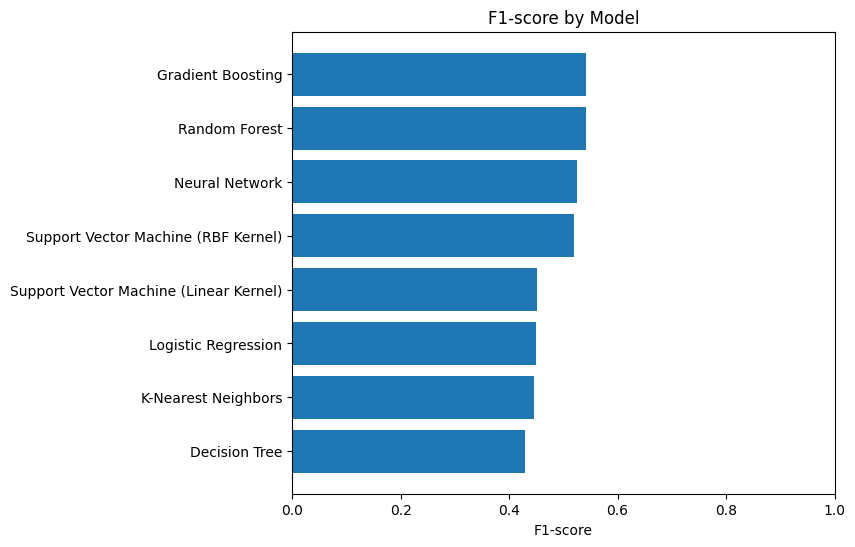

In [230]:
def visualize_results(df_results,sort,model):
    # Sort the DataFrame by the highest score in descending order for each metric
    df_results_sorted = df_results.sort_values(by=sort, ascending=False)[::-1]

    plt.figure(figsize=(7, 6))

    # Plot the F1-score (macro)
    plt.barh(df_results_sorted[model], df_results_sorted[sort])
    plt.xlim(0.0, 1.0)  # Set the x-axis limits
    plt.xlabel('F1-score')
    plt.title('F1-score by Model')

    plt.show()

    

    
# Call the visualize_results function
visualize_results(df_results,'F1_Score','Model')

#### **Hyperparameter Tuning for Four chosen Models using GridSearchCV**

In [231]:
# Set up the parameter grid for each model
gradient_boosting_params = {
    'model__learning_rate': [0.1, 0.01],
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [3, 4, 5]
}

logistic_regression_params = {
    'model__C': [0.1, 1, 10],
    'model__solver': ['liblinear', 'saga']
}

svm_params = {
    'model__C': [0.1, 1, 10],
    'model__kernel': ['linear']
}

neural_network_params = {
    'model__hidden_layer_sizes': [(100,), (100, 50)],
    'model__activation': ['relu', 'tanh'],
    'model__alpha': [0.0001, 0.001]
}

# Perform hyperparameter tuning with cross-validation for each model
models = {
    'Gradient Boosting': (GradientBoostingClassifier(), gradient_boosting_params),
    'Logistic Regression': (LogisticRegression(), logistic_regression_params),
    'Support Vector Machine (Linear Kernel)': (SVC(), svm_params),
    'Neural Network': (MLPClassifier(), neural_network_params)
}
best_score=[]
for model_name, (model, params) in models.items():
    #make a pipeline 
    pipe=Pipeline([('Preprocessor',preprocessor),('model',model)])
    grid_search = GridSearchCV(pipe, params, cv=5, scoring=['accuracy', 'f1_macro'], refit='f1_macro' , n_jobs=-1)
    #fit gridsearch
    grid_search.fit(x_train, y_train)

    #Print Best parameters
    print(f"Best parameters for {model_name}:")
    print(grid_search.best_params_)
    

    #Put scores in a dict
    scores={'model':model_name,'F1_score':grid_search.cv_results_['mean_test_f1_macro'][grid_search.best_index_],'Accuracy':grid_search.cv_results_['mean_test_accuracy'][grid_search.best_index_]}
    best_score.append(scores)

#Put scores in a dataframe
print('=========================================')
scores_df=pd.DataFrame(best_score)
scores_df

KeyboardInterrupt: 

In [ ]:
#sort Dataframe
scores_df.sort_values(by='F1_score',ignore_index=True,ascending=False, inplace=True)
scores_df